# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()



,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
sensor.isnull().values.any()



False

How many rows and columns are in our data?

In [5]:
sensor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
a=pd.date_range(start="1/1/2018 00:00:00", end="1/1/2018 00:29:10", periods=1751)
freq = pd.infer_freq(a)
a.freq=freq


In [7]:
a

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [8]:
sensor.index=a



In [9]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

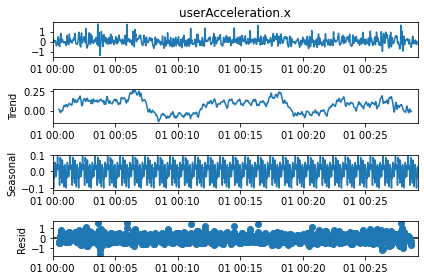

In [10]:
decom= seasonal_decompose(sensor["userAcceleration.x"], model="additive", period=60)
decom.plot();


El gráfico de los valores residuales queda bastante diferente a la imagen de muestra, pero creo que he puesto lo que tenía que poner.

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

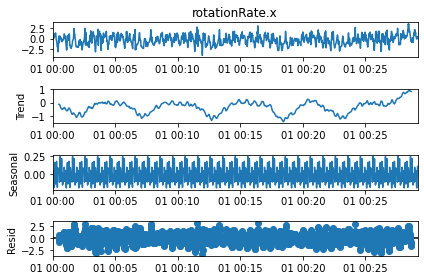

In [11]:
decom2= seasonal_decompose(sensor["rotationRate.x"], model="additive", period=60)
decom2.plot();



Let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

Lo hago directamente con pandas, que me parece más sencillo

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

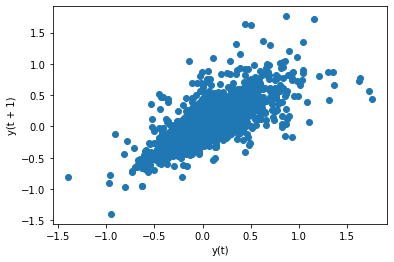

In [12]:
pd.plotting.lag_plot(sensor["userAcceleration.x"], lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

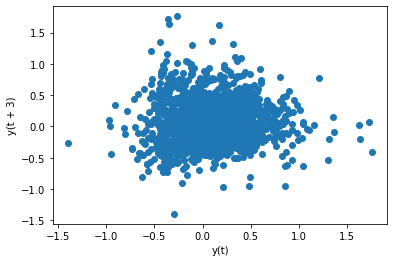

In [13]:
pd.plotting.lag_plot(sensor["userAcceleration.x"], lag=3)

In [14]:
sensor["userAcceleration.x"].autocorr (lag=1)

0.7597036239344239

In [15]:
corr_user=[]
for n in range(1,60):
    corr_user.append (sensor["userAcceleration.x"].autocorr (lag=n))

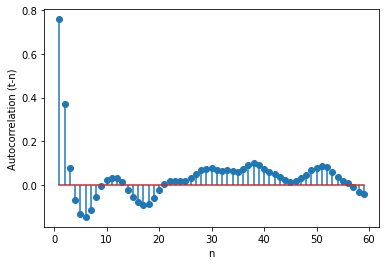

In [16]:
plt.stem(range(1,60),corr_user)
plt.ylabel("Autocorrelation (t-n)")
plt.xlabel("n");

Con un lag de 1 nos queda una correlación a primera vista bastante alta, por eso pruebo con otros valores, y veo que baja bastante. Al final ploteo las correlaciones de 1 min y creo que se puede concluir que no guardan mucha correlación, mas allá de los dos segundos, que probablemente sea lo que tarde en mutar el valor.

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

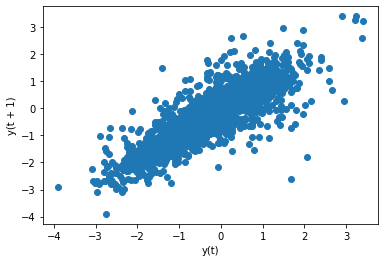

In [17]:
pd.plotting.lag_plot(sensor["rotationRate.x"], lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

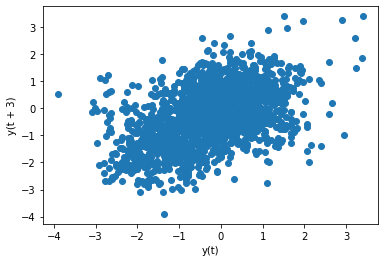

In [18]:
pd.plotting.lag_plot(sensor["rotationRate.x"], lag=3)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 20)'>

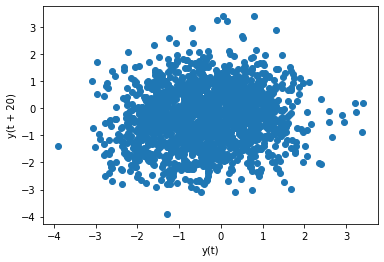

In [19]:
pd.plotting.lag_plot(sensor["rotationRate.x"], lag=20)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 60)'>

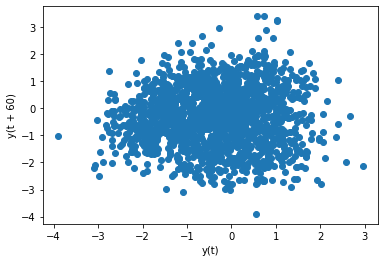

In [20]:
pd.plotting.lag_plot(sensor["rotationRate.x"], lag=60)

In [21]:
sensor["rotationRate.x"].autocorr (lag=1)

0.8470904664379267

In [22]:
corr_rotrate=[]
for n in range(1,60):
    corr_rotrate.append (sensor["rotationRate.x"].autocorr (lag=n))

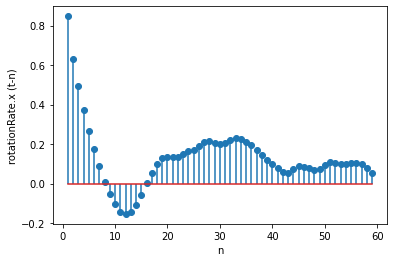

In [23]:
plt.stem(range(1,60),corr_rotrate)
plt.ylabel("rotationRate.x (t-n)")
plt.xlabel("n");

He seguido casi los mismos pasos que en el anterior punto, pero he ploteado algunos lags más. Para este valor se ve una cierta correlación decreciente durante en los primeros 5 segundos.

What are your conclusions from both visualizations?

Es dificil sacar conclusiones cuando no se sabe ni lo que se ve mas allá de lo que he escrito antes, que en el primer caso guarda cierta correlación en los dos pimeros segundos, y para el segundo esta correlación la podemos extender al cuarto segundo 



The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [24]:
adfrot = adfuller(sensor["rotationRate.x"])
adfrot

(-5.2698606250864275,
 6.320230335912049e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

In [25]:
adfuser = adfuller(sensor["userAcceleration.x"])
adfuser

(-17.957994086169734,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

What are your conclusions from this test?

Tanto adf, como pvalue son menores que los valores críticos en ambos casos, por lo que podemos concluir que no existe estacionalidad

